In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3386701128886527583
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3149044121
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3621311786279042231
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [83]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
%matplotlib inline
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [84]:
mask_files = glob.glob(r'D:\observations-master\observations-master\experiements\data\with_mask\*')

In [14]:
mask_files

['D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\0-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\1-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\10-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\100-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\101-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\103-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\104-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\105-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\106-with-mask.jpg',
 'D:\\observations-master\\observations-master\\experiements\\data\\with_mask\\107-with-mask.jpg',
 'D:\\observati

In [85]:
len(mask_files)

690

In [86]:
without_mask_files = glob.glob(r'D:\observations-master\observations-master\experiements\data\without_mask\*')

In [87]:
len(without_mask_files)

686

In [88]:
mask_train = np.random.choice(mask_files, size=500, replace=False)
without_mask_train = np.random.choice(without_mask_files, size=500, replace=False)

In [89]:
len(mask_train), len(without_mask_train)

(500, 500)

In [90]:
#Removing the train files from the overall data
mask_files = list(set(mask_files) - set(mask_train))
without_mask_files = list(set(without_mask_files) - set(without_mask_train))


In [91]:
len(mask_files), len(without_mask_files)

(190, 186)

In [92]:
mask_val = np.random.choice(mask_files, size=90, replace=False)
without_mask_val = np.random.choice(without_mask_files, size=86, replace=False)

mask_files = list(set(mask_files) - set(mask_val))
without_mask_files = list(set(without_mask_files) - set(without_mask_val))

mask_test = np.random.choice(mask_files, size=100, replace=False)
without_mask_test = np.random.choice(without_mask_files, size=100, replace=False)

In [93]:
len(mask_test)

100

In [94]:
print('mask datasets:', mask_train.shape, mask_val.shape, mask_test.shape)
print('without mask datasets:', without_mask_train.shape, without_mask_val.shape, without_mask_test.shape)

mask datasets: (500,) (90,) (100,)
without mask datasets: (500,) (86,) (100,)


In [95]:
type(mask_train)

numpy.ndarray

In [97]:
mask_train_label = [1]*len(mask_train)
mask_val_label = [1]*len(mask_val)
mask_test_label = [1]*len(mask_test)

In [98]:
without_mask_train_label = [0]*len(without_mask_train)
without_mask_val_label = [0]*len(without_mask_val)
without_mask_test_label = [0]*len(without_mask_test)

In [99]:
without_mask_test_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [100]:
train_files = np.concatenate([mask_train, without_mask_train])
validate_files = np.concatenate([mask_val, without_mask_val])
test_files = np.concatenate([mask_test, without_mask_test])

In [62]:
len(train_files)

1000

In [102]:
IMG_DIM = (150, 150)
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = mask_train_label + without_mask_train_label

In [103]:
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validate_files]
validation_imgs = np.array(validation_imgs)
validation_labels = mask_val_label + without_mask_val_label

In [104]:
len(validation_imgs),len(validation_labels)

(176, 176)

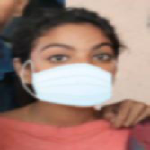

In [105]:
load_img(train_files[1], target_size=IMG_DIM)

In [106]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (1000, 150, 150, 3) 	Validation dataset shape: (176, 150, 150, 3)


(150, 150, 3)


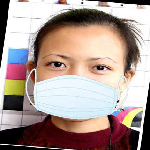

In [107]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[10].shape)
array_to_img(train_imgs[10])

In [108]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [109]:
#Building the model

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [110]:
history = model.fit(x=train_imgs_scaled, y=train_labels,
                    validation_data=(validation_imgs_scaled, validation_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 1000 samples, validate on 176 samples
Epoch 1/30
1000/1000 [==============================] - 3s 3ms/step - loss: 1.1811 - accuracy: 0.6210 - val_loss: 1.9001 - val_accuracy: 0.5114
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3358 - accuracy: 0.8840 - val_loss: 0.1474 - val_accuracy: 0.9545
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1714 - accuracy: 0.9430 - val_loss: 0.1336 - val_accuracy: 0.9659
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1779 - accuracy: 0.9560 - val_loss: 0.1765 - val_accuracy: 0.9489
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0981 - accuracy: 0.9750 - val_loss: 0.1054 - val_accuracy: 0.9716
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0940 - accuracy: 0.9710 - val_loss: 0.1643 - val_accuracy: 0.9602
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0274 - accu

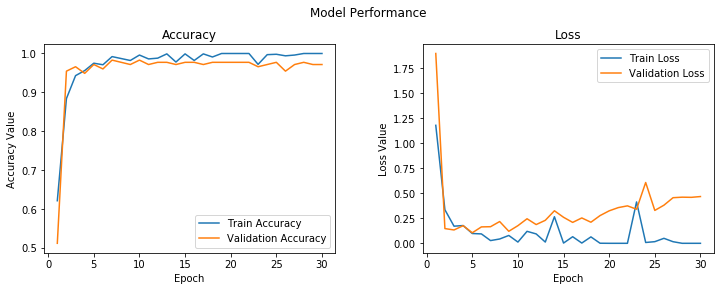

In [116]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [112]:
IMG_DIM = (150, 150)

test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = mask_test_label + without_mask_test_label

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

print('Test dataset shape:', test_imgs.shape)


Test dataset shape: (200, 150, 150, 3)


In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict_classes(test_imgs_scaled, verbose=0)
print(accuracy_score(y_true=test_labels, y_pred=predictions))


0.99


In [115]:
print(confusion_matrix(y_true=test_labels, y_pred=predictions))


[[ 98   2]
 [  0 100]]


[[1]]


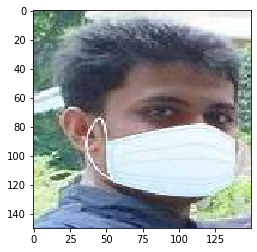

In [134]:
print(model.predict_classes(np.expand_dims(test_imgs_scaled[11], axis=0), verbose=0))

plt.imshow(test_imgs_scaled[11])